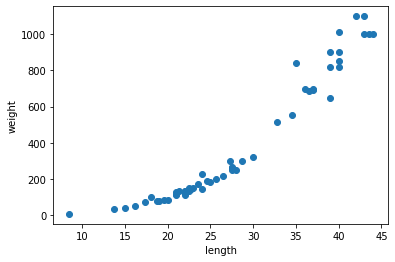

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target)


from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)

print(mae)



19.157142857142862


R^2 = 1 - {((타깃-예측)^ 의 합)) / ((타깃 - 평균 ) ^의 합) }

**과대적합과 과소적합(overfitting, underfitting)**


- 훈련 데이터에만 학습이 잘되어서 실전에서 결과가 나쁜 경우 : 과대적합
- 훈련 데이터가 test data보다 결과가 좋지 않은 경우 : 과소적합
<br>

- 과대적합의 경우 모델을 단순하게 만들어 해결한다 -> 편향(Bias)
- 과소적합의 경우 모델을 복잡하게 만들어 해결한다 -> 분산(Variance)

=> 편향 분산 트레이드오프 (Bias-Variance Tradeoff)



In [ ]:
knr.score(test_input, test_target)
knr.score(train_input, train_target)


0.9698823289099255

# <h1> < K-최근접 이웃 알고리즘의 한계점 > </h1>

[1033.33333333]


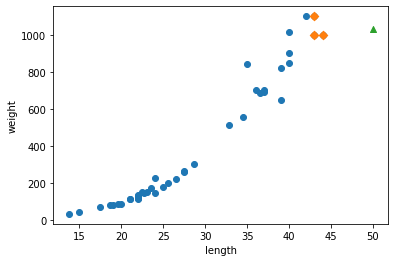

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()




<h2> 선형 회귀 (Linear Regression) </h2>


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)


[1241.83860323]
[39.01714496] -709.0186449535477


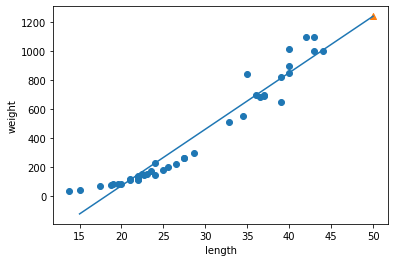

0.9398463339976039
0.8247503123313558


In [ ]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


train data에 대해, test data의 lr.score 값이 상당히 낮게 나온 것을 볼 수 있다. => 과대적합(overfitting)

<h2> 다항 회귀 </h2>

제곱항을 추가한 다항 회귀

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)


(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) # 2차함수로 표현하기 위해 **2 제곱을 추가

print(lr.coef_, lr.intercept_)


[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


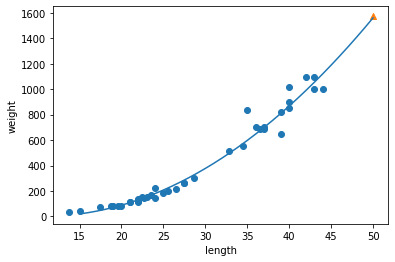

0.9706807451768623
0.9775935108325122


In [ ]:
point = np.arange(15, 51)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))



train data 보다 test data의 score 값이 더 큰 경우

<h1> 다중 회귀 (Multiple Regression) </h1>

- 판다스(pandas) 라이브러리 사용
- 데이터 프레임이라는 데이터 구조 가지고 있음
- 웹의 csv 파일 입력 가능 (원본 파일 불러와서 사용)

In [ ]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)


[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)


<h2> 다항 특성 만들기 </h2>

- 속성 값이 매우 많음 (n차항, n차원 데이터)
- PolynomialFeatures() - 특성을 늘려주는 작업
- linear regression, KNeighborsClassifier 와 같은 클래스를 추정기(Estimator)이라고 명명함. (fit, predict, score과 같은 메소드 보유)
  - fit : 알고리즘 학습하는 메소드는 아님 , transform - > 여러가지 특성, 항의 관계들을 직접 정리
- **[특성공학]** : 기존 특성을 이용해 다른 특성을 만드는 것

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# defalt degree = 2
poly = PolynomialFeatures()
poly.fit([[2, 3]])

print(poly.transform([[2, 3]]))


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

poly.get_feature_names()

test_poly = poly.transform(test_input)


from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))


(42, 9)
0.9903183436982124
0.9714559911594132


In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))


print(lr.score(test_poly, test_target)) # 전혀 예측이 되지 않는 과대적합 발생


(42, 55)
0.9999999999991096
-144.40579242335605


<h2> 규제(Regularization) </h2>
- 과대적합을 방지하기 위한 방법 (정규화: 가중치를 적게 만듬)

In [ ]:
# 규제 전에 표준화 작업

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) # 평균과 표준편차를 각 특성마다 구하는 작업

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)



0.9896101671037343
0.9790693977615398


<h3> 릿지 회귀 (Ridge regression) </h3>
- 가중치의 제곱값을 벌칙으로 사용하여 회귀 계수의 크기를 줄임
- L2규제: 선형회귀에 적용되었을 때 릿지라고 이야기함

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target) 

print(ridge.score(train_scaled, train_target))



print(ridge.score(test_scaled, test_target))

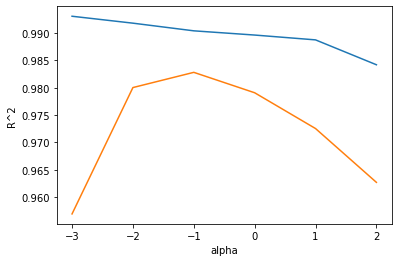

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 하이퍼파라미터 설정
for alpha in alpha_list:

    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))


plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


<h3> 라쏘 회귀(Lasso Regression) </h3>
- 가중치의 절대값을 비용함수에 더해서 불필요한 계수의 값을 0으로 만들어 규제하는 방식
- L1 규제: 선형회귀에 적용되었을때 라쏘라고 함

In [ ]:
# 라쏘 휘귀 (Lasso Regression)

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_ == 0))


0.9897898972080961
0.9800593698421883
42
